<a href="https://colab.research.google.com/github/asyali-mh/Turkish-Text-Prediction/blob/main/Turkish_Text_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This instructional simple study/project aims to demonstrate how language/text generation neural network models work.

In [3]:
# Import necessary libraries..
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

In [4]:
# Load the text, which is the story of "ugly duckling" or "çirkin ördek yavrusu" in Turkish :)
text_str1 = '''
Bir varmış bir yokmuş uzak diyarlardan birisinde büyük bir çiftlik varmış. Bu çiftlikte şirin bir de ördek ailesi varmış. Bu aileden anne ördek yumurtalarının üzerinde oturmuş yavrularının çıkacağı günü büyük bir heyecanla bekliyormuş.
7 tane yumurtası olan anne ördek güneşli bir sabahın ilk saatlerinde nihayet yavrularına kavuşmuş. Yumurtaları tek tek çatlamaya başlayan anne ördeğin yavrularını tüm güzellikleri ile yumurtalarından çıkmışlar. Ancak bir tanesi henüz çatlamaya bile başlamamış. Anne ördek bu duruma şaşırsa da bir süre daha bu büyük yumurtanın üzerinden oturmaya karar vermiş. Bir süre sonra nihayet en büyük yumurta da çatlamış.
Dışarı çıkan ördek etrafa meraklı gözler ile bakıyormuş. Ancak bu ördeğin diğer ördeklerden farklı olması kardeşlerini ve annesini çok şaşırtmış. Diğer ördeklerden daha gri ve iri olan bu ördeğe diğer kardeşleri gülmeye başlamışlar. Daha sonra aralarından bir tanesi büyük ördek yavrusuna bir anda;
” Çok çirkin olduğunu söyledi.” Anne ördek de;” Sen nasıl bir ördeksin böyle” diye söylendi. Tüm kardeşlerinin çirkin diye alay ettikleri büyük ördek bu duruma çok üzülmüştü. Bir süre sonra ise tüm yavrular büyüdüler. Ancak çirkin ördek yavrusu diğer kardeşlerinin neredeyse iki katı olmuştu. Bunun üzerine anne ördek;
Neden bu kadar büyüdün sen benim annem gibi oldun dedi.
Günler geçtikçe kardeşlerinin bile onunla oynamadığı çirkin ördek yavrusu daha da içine kapanmıştı. Her gün daha fazla üzüntü içine kapılan çirkin ördek yavrusu ile arkadaşları da sürekli dalga geçiyorlarmış. Anne ördeğin ise sürekli korumaya çalıştığı çirkin ördek yavrusu için anne ördek;
Yavrum benim acaba neden bu kadar çirkinsin ki diye düşünüyormuş.
Günler birbirini kovalarken her geçen gün çirkin ördek yavrusunu daha da yalnız hale getirmiş. Geceleri tek başına ağlayan büyük ördek kimse tarafından istenmediğini düşünüyormuş. Sürekli olarak kendi kendine aynı soruları soran çirkin ördek;
Neden çirkinim? Niye farklıyım, sorularını düşünerek ağlıyormuş. Günler böyle devam ederken ördeklerin yaşadıkları gölün etrafında bir gün avcılar gelmiş. Ördekleri tek tek avlayan bu kişilere yavrularına yemek arayan anne ördek de yakalanmış. Tüm bu olanlardan habersiz olan çirkin ördek yavrusu da tüm gece annesinin dönmesini beklemiş ama ne gelen var ne giden.
Bu durum üzerine annesini aramaya karar veren çirkin ördek ilk olarak yakınlardaki bir köpeğin yanına gitmiş. Ama köpek onunla konuşmak dahi istememiş. Köpek;
-” Git buradan senin gibi çirkin bir ördek ile konuştuğumu kimse görmesin.” demiş.
Daha sonra tavuğun yanına giden çirkin ördek aynı durumu yine yaşamış. Tavuk çirkin ördek yavrusuna; kendisini bile ondan güzel olduğunu söyleyerek onu uzaklaştırmış.
Annesinin dönmemesi ve diğer hayvanların davranışları nedeniyle iyice yalnızlaşan çirkin ördek yavrusu çiftliği tek etmeye karar vermiş. Bir sabah çiftlikten ayrılan ördek yavrusu yüzerek gölün diğer tarafına ulaşmayı başarmış. Yolculuğa ilk çıktığı andan itibaren gördüğü tüm hayvanlara aynı soruyu sormuş çirkin ördek;
Benim gibi ördek gördünüz mü? Her defasına aynı olumsuz cevabı alan çirkin ördek yılmadan yoluna devam ediyormuş. Diğer göle vardığında ise kazlar ile karşılaşmış. Kazlar çirkin ördeği avcılar konusunda uyararak oradan gitmesini söylemişler. Bir diğer göle geldiğinde ise çirkin ördek kimseyi görememiş. Artık kimse tarafından istenmemekten bıkmış olan çirkin ördek bu ıssız gölde sonsuza kadar saklanmaya karar vermiş.
Bu yeni evinde yalnız olmasına rağmen kimsenin kötü söz söylemediği çirkin ördek çok mutluymuş. Göç zamanı geçen kuşları izliyor. Keşke bende onlar gibi olabilseydim diyormuş. Aylar geçmiş ve kara kış iyice bastırmış. Gökyüzünden beyaz beyaz küçük bir şeyler düşmeye başlamış. Hayatında ilk defa kar gören çirkin ördek bu beyaz örtüyü çok sevmiş. Havadan tek tek düşen kendi üzerini bembeyaz yapan bu görüntü de bir süre oynayan çirkin ördek yemek sıkıntısı çekmeye başlamış.
Karların her tarafı kapatmasından dolayı yemek bulmamaya başlayan çirkin ördek bir süre bu durum ile mücadele etse de artık dayanamamış. Daha sonra bulunduğu yeri terk etmek zorunda kalan çirkin ördek yemek bulmak için yürüme kararı almış. Bir süre yürüdükten sonra üşüyen ve yorulan ördek bir çiftçi ile karşılaşmış. Bu diğerlerinden farklı olan ördeğe acıyan çiftçi onu ceketinin içine almış ve evin götürmüş.
Soğuk havalar geçtikten sonra ise çiftçi daha da büyüyen çirkin ördeğin özgürce dolaşabilmesi için onu yakındaki bir göle bırakmış. Çiftçinin kış ayları boyunca çok iyi baktığı çirkin ördek tekrar bir başına kalmış. Ne yapacağı hakkında bir fikri olmayan çirkin ördek başlarda tekrar aynı şeyleri yaşamaktan çok korkmuş.
Daha sonra önceden yaşadığı ıssız göle gitmeyi düşünerek cesaretini toplamış göl kenarında yürümeye başlayan ördek uzun aradan sonra ilk defa göldeki yansımasından kendisine bakmış. İlk başta gördüklerine kendisi dahi inanamayan ördek arkasında birisinin olduğunu sanmış. Farklı hareketler yapan çirkin ördek göldeki yansımasının da aynı hareketleri yapması ile şaşkınlık içinde;
”Bende gördüğüm kuşlar gibi güzelim artık” demiş. Çiftçinin bakımı sonrasında çok değişen güzelleşen ördek bu halini ilk olarak kendisini ile dalga geçenlere göstermek istemiş. Hemen yeni halini kardeşlerine göstermek için yola koyulan çirkin ördek bir kuğu sürüsü ile karşılaşmış. Onlardan birisi olduğu için kuğular onu hemen aralarına almışlar. Yeni arkadaşları ile uzun süre eğlenceli şekilde yolculuk yapan çirkin ördeği uçarken gören bir çocuk arkadaşlarına;
Hey! Şu en arkada uçan kuğunun güzelliğine bakın diyerek çirkin ördek yavrusunu göstermiş. Gerçekten de çirkin ördek en başından beri bir kuğuymuş aslında. Sadece şanssız şekilde ördek yumurtalarına düştüğü için hayatı boyunca hep yanlış yerdeymiş. Yaşadığı bunca zorluktan sonra gerçek ailesine kavuşan çirkin ördek yavrusu da sonunda mutlu bir hayat yaşamaya ve kendisiyle barışmaya karar vererek mutlu mesut yaşamaya başlamış.
'''

In [5]:
# Multiply the input text string by 5 to obtain a longer text.. (Helps a lot in training :)
text_str = 5*text_str1

In [6]:
# Remove punctuation (except the period character ".") from the text
text_str = re.sub(r'[^\w\s.]','',text_str)
sentences = text_str.split('.')
num_sentences = len(sentences)
avg_num_words = round(sum(len(a_sentence.split()) for a_sentence in sentences) / num_sentences)
print('First few sentences from the text are:')
for a_sentence in sentences[:3]:
  print(a_sentence)
print(f'\nThere are {num_sentences} sentences in the text')
print(f'Average number of words per sentence: {avg_num_words}')

First few sentences from the text are:

Bir varmış bir yokmuş uzak diyarlardan birisinde büyük bir çiftlik varmış
 Bu çiftlikte şirin bir de ördek ailesi varmış
 Bu aileden anne ördek yumurtalarının üzerinde oturmuş yavrularının çıkacağı günü büyük bir heyecanla bekliyormuş

There are 316 sentences in the text
Average number of words per sentence: 13


In [7]:
# Instantiate a Tokenizer, then fit it on the text_str
tokenizer = Tokenizer(filters='\n.') # Remove line breaks and periods
tokenizer.fit_on_texts([text_str])
# Get the word indices for all the tokens (i.e. words)
word_idx = tokenizer.texts_to_sequences([text_str])[0]
print(f'In total, there are {len(word_idx)} words in the text')
index_word_keys = tokenizer.index_word.keys()
print(f'There are {len(index_word_keys)} elements (word to index mappings) in "word_idx" dictionary')
print(f'(Which also means that the number of unique words in the text is {len(index_word_keys)})')
print(f'Min and Max index values in "word_idx" dictionary are: {min(index_word_keys)}, {max(index_word_keys)}')
print('Top 5 most frequent words in the text and their respective counts are:')
for i in range(1,6):
  print(f'Word: {tokenizer.index_word[i]:.>10}, Count: {tokenizer.word_counts[tokenizer.index_word[i]]}')
# Key 0 is reserved for OOV (out of vocabulary) words, so vocab_size is increased by 1
vocab_size = len(tokenizer.index_word) + 1
print('Vocabulary size:',vocab_size)
# Set sentiment length as half of "average number of words per sentence"
sentiment_len = round(avg_num_words/4)
sequence_len = sentiment_len + 1
print(f'We assume that each sequence of {sentiment_len} consecutive words is enough to establish a context..')
# Make sequences of indices corresponding to sentiments/contexts, moving one word (index) at a time
sequences = []
for i in range(sequence_len, len(word_idx)):
  sequences.append(word_idx[i-sequence_len:i])

In total, there are 4200 words in the text
There are 459 elements (word to index mappings) in "word_idx" dictionary
(Which also means that the number of unique words in the text is 459)
Min and Max index values in "word_idx" dictionary are: 1, 459
Top 5 most frequent words in the text and their respective counts are:
Word: .....ördek, Count: 235
Word: ....çirkin, Count: 165
Word: .......bir, Count: 150
Word: ........bu, Count: 95
Word: .......ile, Count: 55
Vocabulary size: 460
We assume that each sequence of 3 consecutive words is enough to establish a context..


In [8]:
# Helper function to convert word indices to text..
def make_sentence(word_idxs):
  return ' '.join([tokenizer.index_word[idx] for idx in word_idxs])

In [9]:
# Print first few sequences and corresponding list of words
for idx in range(3):
  print(f"Sentence: {make_sentence(sequences[idx])}\nSequence: {sequences[idx]}")

Sentence: bir varmış bir yokmuş
Sequence: [3, 31, 3, 114]
Sentence: varmış bir yokmuş uzak
Sequence: [31, 3, 114, 115]
Sentence: bir yokmuş uzak diyarlardan
Sequence: [3, 114, 115, 116]


In [10]:
# Create training data from sequences..
Xy = np.array(sequences)
X, y = Xy[:,:-1], Xy[:,-1] # Training data and targets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
print('Shape of training input data (X):',X_train.shape)
print('Shape of training output (target) data (y):',y_train.shape)
print('Shape of validation input data (X):',X_val.shape)
print('Shape of validation output (target) data (y):',y_val.shape)

Shape of training input data (X): (3356, 3)
Shape of training output (target) data (y): (3356,)
Shape of validation input data (X): (840, 3)
Shape of validation output (target) data (y): (840,)


In [11]:
# Core function of the study: Define, compile, and fit (i.e. train) a NN model
def get_model(output_dim):
  # "output_dim" refers to the Embedding layer's output size
  model = Sequential() # Initialize a sequential NN model
  # Add an Embedding layer with the right parameters
  model.add(Embedding(input_dim=vocab_size,output_dim=output_dim,input_length=sentiment_len))
  # Add LSTM layer with "2*output_dim" units (neurons)
  model.add(LSTM(2*output_dim))
  # Add Dense layer of "2*output_dim" units (neurons) with relu activation
  model.add(Dense(4*output_dim,activation='relu'))
  # Add Output layer of vocab_size units (neurons) with softmax activation
  model.add(Dense(vocab_size,activation='softmax'))
  # Compile model with "adam" optimizer and "sparse_categorical_crossentropy"
  model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
  return model # Return the trained model

In [12]:
# Helper function to predict text (i.e. next word) using the given trained model
def predict_next(model,in_seq):
  # Use the model to predict the index of next word
  pred = model.predict(in_seq,verbose=0)[0].argmax()
  # Return the word that maps to the prediction
  return pred

In [13]:
# Helper function to print predicted and actual next words
def print_res(end_idx):
  for a_seq in sequences[:end_idx]:
    in_seq = a_seq[:-1]
    out_idx = predict_next(model,[in_seq])
    actual_idx = a_seq[-1]
    print(f'Input: {make_sentence(in_seq)}\n--> \
Output: {make_sentence([actual_idx])} (Actual), {make_sentence([out_idx])} (Predicted)')

In [14]:
# Helper function to find the number of model parameters
def num_model_params(model):
  return np.sum([np.prod(v.shape) for v in model.trainable_variables])

In [26]:
# Hyper-parameter tuning..
results, epoch_start, epoch_step = [], 150, 50
for output_dim in range(3,2*sentiment_len+1):
  model = get_model(output_dim)
  epochs_now = epoch_start
  for _ in range(6):
    model.fit(X_train,y_train,epochs=epoch_step,verbose=0,validation_data=[X_val,y_val])
    accuracy_train = model.evaluate(X_train,y_train,verbose=0)[1]
    accuracy_val = model.evaluate(X_val,y_val,verbose=0)[1]
    print(f'Output dim: {output_dim:2}, Epochs: {epochs_now:3}, # of model parameters: {num_model_params(model):5},\
 Training Accuracy: {accuracy_train:7.2%}, Validation Accuracy: {accuracy_val:7.2%}')
    results.append([output_dim,epochs_now,accuracy_train,accuracy_val])
    epochs_now += epoch_step

Output dim:  3, Epochs: 150, # of model parameters:  7684, Training Accuracy:  29.71%, Validation Accuracy:  20.24%
Output dim:  3, Epochs: 200, # of model parameters:  7684, Training Accuracy:  52.41%, Validation Accuracy:  37.26%
Output dim:  3, Epochs: 250, # of model parameters:  7684, Training Accuracy:  71.39%, Validation Accuracy:  57.86%
Output dim:  3, Epochs: 300, # of model parameters:  7684, Training Accuracy:  82.24%, Validation Accuracy:  70.48%
Output dim:  3, Epochs: 350, # of model parameters:  7684, Training Accuracy:  87.90%, Validation Accuracy:  78.81%
Output dim:  3, Epochs: 400, # of model parameters:  7684, Training Accuracy:  91.39%, Validation Accuracy:  84.52%
Output dim:  4, Epochs: 150, # of model parameters: 10220, Training Accuracy:  35.04%, Validation Accuracy:  25.95%
Output dim:  4, Epochs: 200, # of model parameters: 10220, Training Accuracy:  77.26%, Validation Accuracy:  67.14%
Output dim:  4, Epochs: 250, # of model parameters: 10220, Training Accu

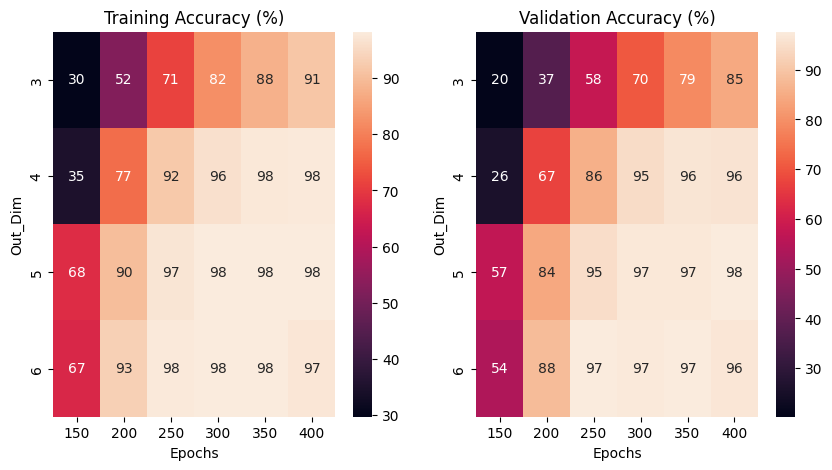

In [16]:
# Visualize results to pick up (or select) the best/optimal output_dim and epoch values
df_results = pd.DataFrame(results,columns=['Out_Dim','Epochs','Train_Accuracy','Val_Accuracy'])
df_results.Out_Dim = df_results.Out_Dim.astype(int)
df_results.Epochs = df_results.Epochs.astype(int)
matrix_Train = pd.pivot_table(df_results, values='Train_Accuracy', index='Out_Dim',columns='Epochs')
matrix_Val = pd.pivot_table(df_results, values='Val_Accuracy', index='Out_Dim',columns='Epochs')
_,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(matrix_Train,annot=True,fmt='.0f',ax=ax1); ax1.set_title('Training Accuracy (%)')
sns.heatmap(matrix_Val,annot=True,fmt='.0f',ax=ax2); ax2.set_title('Validation Accuracy (%)');

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              2300      
                                                                 
 lstm (LSTM)                 (None, 10)                640       
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 460)               9660      
                                                                 
Total params: 12,820
Trainable params: 12,820
Non-trainable params: 0
_________________________________________________________________


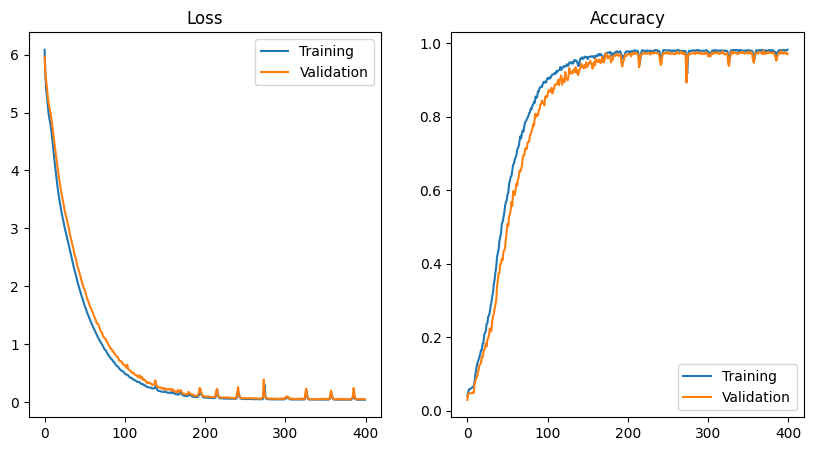

In [17]:
# From the heatmaps above, we note that the best/optimal choice for output_dim and epoch values are 10 and 400 respectively
# We also note that even though training accuracies of different models are relatively high,
# their validation accuracies are suprisignly low :(
# Let us now further examine and evaluate results for the best/optimal model
output_dim, epochs = 5, 400 # Optimal values
# Regenarete the model with optimal "output_dim," summarize it, and train it with the optimal number of epochs :)
model = get_model(output_dim)
model.summary()
# This time we also keep track of the history of training/validaiton epochs and don't turn off the verbose output :)
h = model.fit(X_train,y_train,epochs=epochs,verbose=0,validation_data=[X_val,y_val])
# Plot training and validation loss and accuracy
_,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(h.history['loss']); ax1.plot(h.history['val_loss']); ax1.set_title('Loss'); ax1.legend(['Training','Validation'])
ax2.plot(h.history['accuracy']); ax2.plot(h.history['val_accuracy']); ax2.set_title('Accuracy'); ax2.legend(['Training','Validation']);

In [200]:
# Recompute training and validation accuracies corresponding to the best parameter values
accuracy_train = model.evaluate(X_train,y_train,verbose=0)[1]
accuracy_val = model.evaluate(X_val,y_val,verbose=0)[1]
print(f'Results for optimal parameters (i.e. {output_dim=}, {epochs=})')
print(f'Training Accuracy: {accuracy_train:7.2%}, Validation Accuracy: {accuracy_val:7.2%}')
# Print some sample predictions and actual next words..
n_print_samples = 10
print(f'\nHere are the first {n_print_samples} word sequences from the beginning of the text and\ncorresponding actual and predicted next words:')
print_res(10)

Results for optimal parameters (i.e. output_dim=5, epochs=400)
Training Accuracy:  98.21%, Validation Accuracy:  97.02%

Here are the first 10 word sequences from the beginning of the text and
corresponding actual and predicted next words:
Input: bir varmış bir
--> Output: yokmuş (Actual), yokmuş (Predicted)
Input: varmış bir yokmuş
--> Output: uzak (Actual), uzak (Predicted)
Input: bir yokmuş uzak
--> Output: diyarlardan (Actual), diyarlardan (Predicted)
Input: yokmuş uzak diyarlardan
--> Output: birisinde (Actual), birisinde (Predicted)
Input: uzak diyarlardan birisinde
--> Output: büyük (Actual), büyük (Predicted)
Input: diyarlardan birisinde büyük
--> Output: bir (Actual), bir (Predicted)
Input: birisinde büyük bir
--> Output: çiftlik (Actual), çiftlik (Predicted)
Input: büyük bir çiftlik
--> Output: varmış (Actual), varmış (Predicted)
Input: bir çiftlik varmış
--> Output: bu (Actual), bu (Predicted)
Input: çiftlik varmış bu
--> Output: çiftlikte (Actual), çiftlikte (Predicted)


In [88]:
# Let us try generating an "artificial" version of the "ugly duckling" story by using our model (i.e. trained NN)
seed_txt = 'bir varmış bir' # We start with a seed text of length 3 (sentiment_len) words
seed_seq = np.array(tokenizer.texts_to_sequences([seed_txt])) # Convert it to a sequence of indices using our tokenizer
print(seed_txt, end=' ')
out_txt = seed_txt
line_break_cnt = 5
for idx in range(205): # Start telling our fabricated story for next 205 words! :)
  # Use the model to predict the next word
  pred_idx = model.predict(seed_seq,verbose=0)[0].argmax() # Predicted index
  # Return the word that maps to the prediction
  pred_txt = tokenizer.index_word[pred_idx]# (Predicted) word corresponding to the predicted index
  out_txt += ' ' + pred_txt
  print(pred_txt, end=' ')
  line_break_cnt += 1
  if line_break_cnt>=10:
    print(); line_break_cnt = 0
  # Update the seed sequence to generate/predict the next word
  seed_seq = np.array([[*seed_seq[0][1:], pred_idx]])

bir varmış bir yokmuş uzak diyarlardan birisinde büyük 
bir çiftlik varmış bu çiftlikte şirin bir de ördek ailesi 
varmış bu aileden anne ördek yumurtalarının üzerinde oturmuş yavrularının çıkacağı 
günü büyük bir heyecanla bekliyormuş 7 tane yumurtası olan anne 
ördek güneşli bir sabahın ilk saatlerinde nihayet yavrularına kavuşmuş yumurtaları 
tek tek çatlamaya başlayan anne ördeğin yavrularını tüm güzellikleri ile 
yumurtalarından çıkmışlar ancak bir tanesi henüz çatlamaya bile başlamamış anne 
ördek bu duruma şaşırsa da bir süre daha bu büyük 
yumurtanın üzerinden oturmaya karar vermiş bir süre sonra ise tüm 
yavrular büyüdüler ancak çirkin ördek yavrusu ile arkadaşları da sürekli 
dalga geçiyorlarmış anne ördeğin ise sürekli korumaya çalıştığı çirkin ördek 
yavrusu ile arkadaşları da sürekli dalga geçiyorlarmış anne ördeğin ise 
sürekli korumaya çalıştığı çirkin ördek yavrusu ile arkadaşları da sürekli 
dalga geçiyorlarmış anne ördeğin ise sürekli korumaya çalıştığı çirkin ördek 


In [207]:
# Compare predicted and actual texts character-wise..
pred_len = len(out_txt)
actual_txt = re.sub('\n',' ',re.sub(r'[^\w\s]','',text_str1)).strip().lower()[:pred_len]
compare_seqs = (np.array(list(out_txt))!=np.array(list(actual_txt)))
n_match = compare_seqs.sum()
print(f'Number of characters in the generated sequence: {pred_len}')
print(f'Number of matching characters across actual and generated text is: {n_match} ({n_match/pred_len:.2%})')
# Let's try to find where the first "character miss" in our prediction occurs
hit_miss_idxs = np.where(compare_seqs)[0]
first_miss_idx = hit_miss_idxs[0]
print(f'First miss occurs at character index {first_miss_idx}')
print('Actual and predicted character sequences centered around this miss are:')
print(f'Actual:    "{actual_txt[first_miss_idx-20:first_miss_idx+20]}"')
print(f'Predicted: "{out_txt[first_miss_idx-20:first_miss_idx+20]}"')

Number of characters in the generated sequence: 1505
Number of matching characters across actual and generated text is: 837 (55.61%)
First miss occurs at character index 604
Actual and predicted character sequences centered around this miss are:
Actual:    "rmiş bir süre sonra nihayet en büyük yum"
Predicted: "rmiş bir süre sonra ise tüm yavrular büy"


In [210]:
# Compare predicted and actual texts word-wise..
pred_words, actual_words = out_txt.split(), actual_txt.split()
n_pred_words, n_actual_words = len(pred_words), len(actual_words)
n_words = min(n_pred_words,n_actual_words) # Get the minimum of predicted and actual number of words
compare_seqs = (np.array(pred_words[:n_words])!=np.array(actual_words[:n_words]))
n_match = compare_seqs.sum()
print(f'Number of words in the actual text (corresponding to predicted character length): {n_actual_words}')
print(f'Number of words in the generated sequence: {n_pred_words}')
print(f'Number of matching words across actual and generated text is: {n_match} ({n_match/n_words:.2%})')
# Let's try to find where the first "word miss" in our prediction occurs
hit_miss_idxs = np.where(compare_seqs)[0]
first_miss_idx = hit_miss_idxs[0]
print(f'First miss occurs at word index {first_miss_idx}')
print('Actual and predicted word sequences centered around this miss are:')
print(f'Actual:    "{actual_words[first_miss_idx-5:first_miss_idx+5]}"')
print(f'Predicted: "{pred_words[first_miss_idx-5:first_miss_idx+5]}"')

Number of words in the actual text (corresponding to predicted character length): 221
Number of words in the generated sequence: 208
Number of matching words across actual and generated text is: 120 (57.69%)
First miss occurs at word index 86
Actual and predicted word sequences centered around this miss are:
Actual:    "['karar', 'vermiş', 'bir', 'süre', 'sonra', 'nihayet', 'en', 'büyük', 'yumurta', 'da']"
Predicted: "['karar', 'vermiş', 'bir', 'süre', 'sonra', 'ise', 'tüm', 'yavrular', 'büyüdüler', 'ancak']"


### Comments:
It seems that our “learned story-teller” makes a pretty good start in predicting next words, given the correct starter (i.e. the seed sequence). Up until first 86 words, we got the story right then the network/model makes a wrong prediction and things start to get out of control.

After making a prediction we slide our window of "3 previous word indices" towards right to drop the left-most word (i.e. oldest word in the context) and include the newly guessed word -without no way of knowing whether it is the "right" word. Hence, once there are wrongly guessed words in the context; our network is bound to make more mistakes in its future guesses.

Nevertheless, in our final “reality test” where we asked our trained model to make 205 word predictions given the initial seed of 3 words, it was able correctly predict 120 words (57.69%) out of (total of) 208. This means that even though after the 86th word we start to make mistakes in our predictions, we were able to predict another 120-86 = 34 words correctly.

### To do list:
- Try the code/methodology with different texts of varying length and complexity
- Try changing the context length (in the above code, we've weirdly referred to this parameter as "sentiment_len" 😊)
- Try using RNN units instead of LSTM